In [9]:
import os
import sys
import glob
import cv2
import matplotlib.pyplot as plt # 주피터 환경에서 이미지 열어주는거
import numpy as np

In [10]:
STUDENT_CODE = '2017147505'
FILE_NAME = 'output.txt'
if not os.path.exists(STUDENT_CODE):
    os.mkdir(STUDENT_CODE)
f = open(os.path.join(STUDENT_CODE, FILE_NAME),'w')

# f.write("aaa")
# f.close()

In [11]:
# 이미지를 전부 읽어와서 vectorize한 다음 하나로 합친다.
train_images = []

image = cv2.imread("faces_training/face01.pgm", cv2.IMREAD_GRAYSCALE)
train_images.append(image)

length, height = image.shape
image = image.reshape((1, length * height * 1))

for i in range(2, 10):
    x = cv2.imread(f"faces_training/face0{i}.pgm", cv2.IMREAD_GRAYSCALE)
    train_images.append(x)
    temp = x.reshape((1, length * height * 1))
    image = np.concatenate([image, temp], axis=0)

for i in range(10, 40):
    x = cv2.imread(f"faces_training/face{i}.pgm", cv2.IMREAD_GRAYSCALE)
    train_images.append(x)
    temp = x.reshape((1, length * height * 1))
    # print(temp.shape)
    image = np.concatenate([image, temp], axis=0)

# image = np.concatenate([x,y,z], axis=0)
print(image.T.shape)

(32256, 39)


In [4]:

def computeDimensions(img, percent=0.9):
    
    # computing eigenvalues and eigenvectors of covariance matrix
    matrix = (img - np.mean(img.T, axis=1)).T # subtract the mean (along columns)

    U, Sv, Vt = np.linalg.svd(img)
    V = Vt.T
    
    whole_nom_of_pc = np.size(U, axis=0)
    
    # Sv 는 고유값 리스트이다. 
    Sv = sorted(Sv)
    Sv = Sv[::-1]  # 순서를 높은게 앞에 오도록 변경
    
    sum_of = 0
    numPc=0
    sum_all = sum(Sv)
        
    for i in range(whole_nom_of_pc):
        sum_of += Sv[i]
        numPc += 1
        # print(f"현재 고유 값{i} : {eigvals[i]}")
        if(sum_of/sum_all >= percent):
            break
    
    print("numPc", numPc)
    
    if numPc < whole_nom_of_pc and numPc >= 0:
        U = U[:, :numPc]  # 입력된 pc 개수에 따라 선택한다.
        print("U.shape", U.shape)
        Sv = np.diag(Sv[:numPc])
    
    reconstruct = np.dot(U, np.dot(Sv, Vt[:numPc, :]))
    return reconstruct, numPc

# perc = sys.argv[1]
perc = 0.95

image1 = cv2.imread("faces_training/face01.pgm", cv2.IMREAD_GRAYSCALE)

reconstruct, numPc = computeDimensions(image1, perc)
# reconstruct, numPc = computeDimensions(image, perc)

print("######### Step1 #########")
f.write("######### Step1 #########\n")
print(f"Input Percentage: {perc}")
f.write(f"Input Percentage: {perc}\n")
print(f"Selected Dimansion : {numPc}")
f.write(f"Selected Dimansion : {numPc}\n")

print("######### Step2 #########")
f.write("######### Step2 #########\n")

print("Reconstruction error")
f.write("Reconstruction error\n")

re_error = []
re_imgs = []
row, col = train_images[1].shape

for n in range(39):
    re_err_sum = 0
    re_img = reconstruct[n].reshape(192, 168)
    for i in range(row):
        for j in range(col):
            re_err_sum += (train_images[n][i][j] - re_img[i][j])**2
    
    re_error.append(re_err_sum/(row*col))
    re_imgs.append(re_img)

    
print(f"Input Percentage: {perc}")
f.write(f"Input Percentage: {perc}\n")
print(f"Selected Dimansion : {numPc}")
f.write(f"Selected Dimansion : {numPc}\n")

f.write(f"average : {sum(re_error)}")
for n in range(1, 10):
    f.write(f"0{n}: {re_error[n]}")
    cv2.imwrite(f"{STUDENT_CODE}/face0{n}.png", re_imgs[n-1])
    
for n in range(10, 40):
    f.write(f"{n}: {re_error[n]}")
    cv2.imwrite(f"{STUDENT_CODE}/face{n}.png", re_imgs[n-1])

# f.close()

numPc 45
U.shape (192, 45)
######### Step1 #########
Input Percentage: 0.93
Selected Dimansion : 45
######### Step2 #########
Reconstruction error


ValueError: cannot reshape array of size 168 into shape (192,168)

In [5]:
# for step3

print("######### Step3 #########")
f.write("######### Step3 #########\n")

# 우선 test 의 이미지도 reconstruct 한다.
###
def princomp(img, pc_limit=0):
    #특잇값 분해

    S = np.diag(s[:k])
    B = np.dot(U[:, :k], np.dot(S, VT[:k, :]))

    Ursv, Sv, Vlsvt = np.linalg.svd(img)

    whole_num_pc = np.size(Ursv, axis=1)

    # Sv = np.diag(Sv)
    Sv = sorted(Sv)
    Sv = Sv[::-1]
    
    if pc_limit < whole_num_pc and pc_limit >= 0:
        Ursv = Ursv[:, range(pc_limit)]  # 입력된 pc 개수에 따라 선택한다.
        Sv = Sv[:pc_limit]
    
    fin = np.dot(Ursv, np.dot(Sv, Vlsvt[:pc_limit, :]))
    return fin

###

print(re_imgs[0].shape)

row, col = re_imgs[0].shape
for a in range(1,6):
    distances = []
    test01 = cv2.imread(f'faces_test/test0{a}.pgm', cv2.IMREAD_GRAYSCALE)
    test01 = princomp(test01, numPc)
    
    for n in range(39): 
        sum_of=0
        for r in range(row):
            for c in range(col):
                sum_of += (test01[r][c] - re_imgs[n][r][c])**2
        distances.append(np.sqrt(sum_of))
    found = distances.index(min(distances)) + 1
    if found >= 10 : 
        print(f"test0{a}.pgm ==> face{found}.pgm")
        f.write(f"test0{a}.pgm ==> face{found}.pgm")
    else : 
        print(f"test0{a}.pgm ==> face0{found}.pgm")
        f.write(f"test0{a}.pgm ==> face0{found}.pgm")
        
f.close()

######### Step3 #########


NameError: name 're_imgs' is not defined

In [ ]:
# for step2,


# reconsturct 함수
def reconstruct(img, pc_limit=0):

    # computing eigenvalues and eigenvectors of covariance matrix
    # matrix = (img - np.mean(img))/ # subtract the mean (along columns)

    Ursv, Sv, Vlsvt = np.linalg.svd(img)
    Vlsv = Vlsvt.T

    whole_num_pc = np.size(Ursv, axis=1)

    # Sv = np.diag(Sv)
    Sv = sorted(Sv)
    Sv = Sv[::-1]  # in ascending order. 순서를 높은게 앞에 오도록 변경
    # sorting eigenvectors according to the sorted eigenvalues
    # 고유값이 정렬된 순서에 따라 대응하는 고유벡터들도 정렬한다.
    # coeff = coeff[:,sortEigvals]

    # eigvals = eigvals[sortEigvals] # sorting eigenvalues
    if pc_limit < whole_num_pc and pc_limit >= 0:
        Ursv = Ursv[:, range(pc_limit)]  # 입력된 pc 개수에 따라 선택한다.
        Sv = Sv[:pc_limit]
    sc = np.dot(Ursv.T, img)
    fn = np.dot(Ursv, sc)# + np.mean(img)
    return sc, fn

sc, fn = reconstruct(train_images[1], 27)

plt.title("test")
plt.imshow(train_images[1], cmap='gray')
plt.show()

plt.title("re")
plt.imshow(fn, cmap='gray')
plt.show()

row, col = fn.shape
summ = 0

for i in range(row):
    for j in range(col):
        # print(train_images[1][i][j],np.abs(fn[i][j]))
        s = (train_images[1][i][j]-np.abs(fn[i][j]))**2
        summ += s # 전체 합.
        
re_error = summ/(row*col) # 전체합을 n으로 나누고 복소수를 float으로 전환
print(f"Reconstructed error :{round(re_error, 4)}") # Reconstruction error 소숫점 4자리까지 보여짐


(39, 32256)
(192, 192)
(168,)
(168, 168)


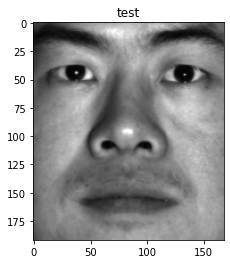

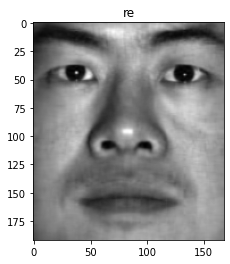

Reconstructed error :8.4401


In [60]:
# 이미지를 전부 읽어와서 vectorize한 다음 하나로 합친다.
train_images = []

image = cv2.imread("faces_training/face01.pgm", cv2.IMREAD_GRAYSCALE)
train_images.append(image)

length, height = image.shape
image = image.reshape((1, length * height * 1))

for i in range(2, 10):
    x = cv2.imread(f"faces_training/face0{i}.pgm", cv2.IMREAD_GRAYSCALE)
    train_images.append(x)
    temp = x.reshape((1, length * height * 1))
    image = np.concatenate([image, temp], axis=0)

for i in range(10, 40):
    x = cv2.imread(f"faces_training/face{i}.pgm", cv2.IMREAD_GRAYSCALE)
    train_images.append(x)
    temp = x.reshape((1, length * height * 1))
    # print(temp.shape)
    image = np.concatenate([image, temp], axis=0)

# image = np.concatenate([x,y,z], axis=0)
print(image.shape)

# Uu, Dd, Vt = np.linalg.svd(image)
Uu, Dd, Vt = np.linalg.svd(train_images[0])

# for step2,
# reconsturct 함수
def princomp(img, pc_limit=0):

    # computing eigenvalues and eigenvectors of covariance matrix
    # matrix = (img - np.mean(img))/ # subtract the mean (along columns)

    Ursv, Sv, Vlsvt = np.linalg.svd(img)
    Vlsv = Vlsvt.T

    whole_num_pc = np.size(Ursv, axis=1)

    # Sv = np.diag(Sv)
    Sv = sorted(Sv)
    Sv = Sv[::-1]  # in ascending order. 순서를 높은게 앞에 오도록 변경
    # sorting eigenvectors according to the sorted eigenvalues
    # 고유값이 정렬된 순서에 따라 대응하는 고유벡터들도 정렬한다.
    # coeff = coeff[:,sortEigvals]

    # eigvals = eigvals[sortEigvals] # sorting eigenvalues
    if pc_limit < whole_num_pc and pc_limit >= 0:
        Ursv = Ursv[:, range(pc_limit)]  # 입력된 pc 개수에 따라 선택한다.
        Sv = Sv[:pc_limit]
    sc = np.dot(Ursv.T, img)
    fn = np.dot(Ursv, sc)# + np.mean(img)
    return sc, fn

sc, fn = princomp(train_images[1], 27)

plt.title("test")
plt.imshow(train_images[1], cmap='gray')
plt.show()

plt.title("re")
plt.imshow(fn, cmap='gray')
plt.show()

row, col = fn.shape
summ = 0

for i in range(row):
    for j in range(col):
        # print(train_images[1][i][j],np.abs(fn[i][j]))
        s = (train_images[1][i][j]-np.abs(fn[i][j]))**2
        summ += s # 전체 합.
        
re_error = summ/(row*col) # 전체합을 n으로 나누고 복소수를 float으로 전환
print(f"Reconstructed error :{round(re_error, 4)}") # Reconstruction error 소숫점 4자리까지 보여짐


In [61]:
final_list = []

for n in range(39):
    img = (train_images[n]-np.mean(train_images[n].T,axis=1)) # subtract the mean (along columns)
    
    sc, fn = princomp(train_images[n], 15)
    final_list.append(np.abs(fn))

    row, col = fn.shape
    summ = 0
    
    for i in range(row):
        for j in range(col):
            s = (train_images[n][i][j]-np.abs(fn[i][j]))**2
            summ += s # 전체 합.
    re_error = summ/(row*col) # 전체합을 n으로 나누고 복소수를 float으로 전환
    print(f"Reconstructed error :{round(re_error, 4)}") # Reconstruction error 소숫점 4자리까지 보여짐

# final_list[0] 은 face01의 리컨스트럭션 이미지다.

Reconstructed error :33.7456
Reconstructed error :24.5725
Reconstructed error :35.455
Reconstructed error :18.7964
Reconstructed error :47.0987
Reconstructed error :41.5384
Reconstructed error :23.1266
Reconstructed error :28.3333
Reconstructed error :28.0904
Reconstructed error :47.7204
Reconstructed error :29.7264
Reconstructed error :37.4612
Reconstructed error :33.5729
Reconstructed error :34.0608
Reconstructed error :37.8382
Reconstructed error :35.3942
Reconstructed error :35.7079
Reconstructed error :25.1743
Reconstructed error :27.6744
Reconstructed error :20.1693
Reconstructed error :36.0507
Reconstructed error :50.6195
Reconstructed error :31.7721
Reconstructed error :23.7466
Reconstructed error :36.4166
Reconstructed error :32.0288
Reconstructed error :38.1405
Reconstructed error :37.7178
Reconstructed error :48.939
Reconstructed error :31.3087
Reconstructed error :18.0816
Reconstructed error :23.6567
Reconstructed error :21.2011
Reconstructed error :31.4783
Reconstructed er

In [ ]:
U, D, Vt = np.linalg.svd(image)

In [ ]:
print("######### Step1 #########")
    
def computeDimensions(img, percent=0.9):
    
    # computing eigenvalues and eigenvectors of covariance matrix
    matrix = (img - np.mean(img.T, axis=1)).T # subtract the mean (along columns)

    [U, D, Vt] = np.linalg.svd(img)
    V = Vt.T
    print(U.shape)
    print(D.shape)
    print(V.shape)
    
    whole_nom_of_pc = np.size(U, axis=0)
    
    diagD = np.diag(D)
    diagD = sorted(diagD)
    diagD = diagD[::-1]
    
    ssum = 0
    numPc=0
    sumvar = sum(diagD)
        
    for i in range(whole_nom_of_pc):
        ssum += diagD[i]
        numPc += 1
        # print(f"현재 고유 값{i} : {eigvals[i]}")
        if(ssum/sumvar >= percent):
            print("확률 : ",ssum/sumvar)
            break
    
    print("전체 차원 수 ", whole_nom_of_pc)
    print("선택된 차원 수 ", numPc)    
    return numPc
    
perc = 0.93
numPc = computeDimensions(image, perc)
# print(f"nput Percentage: {sys.argv[1]}")
print(f"Input Percentage: {perc}")
print(f"Selected Dimansion : {numPc}")
    

######### Step1 #########


In [112]:
# for step2,
# reconsturct 함수
def princomp(img, pc_limit=0):

    # computing eigenvalues and eigenvectors of covariance matrix
    matrix = (img - np.mean(img.T, axis=1)).T # subtract the mean (along columns)
    
    [eigvals,eigvecs] = np.linalg.eig(np.cov(matrix))
    
    whole_num_pc = np.size(eigvecs,axis=1)

    sortEigvals = sorted(eigvals) # 고유값을 정렬한다.
    sortEigvals = sortEigvals[::-1]       # in ascending order. 순서를 높은게 앞에 오도록 변경
    # sorting eigenvectors according to the sorted eigenvalues
    # 고유값이 정렬된 순서에 따라 대응하는 고유벡터들도 정렬한다.
    # coeff = coeff[:,sortEigvals]
    
    # eigvals = eigvals[sortEigvals] # sorting eigenvalues
    if pc_limit < whole_num_pc and pc_limit >= 0:
        eigvecs = eigvecs[:,range(pc_limit)] # 입력된 pc 개수에 따라 선택한다.
        eigvals = eigvals[:pc_limit]
        
    score = np.dot(eigvecs.T,matrix) # projection of the data in the new space
    final = np.dot(eigvecs, score).T + np.mean(img, axis=0)
    return eigvecs,score,eigvals, final

In [113]:
final_list = []

for n in range(39):
    img = (train_images[n]-np.mean(train_images[n].T,axis=1)) # subtract the mean (along columns)
    
    eigenvector, score, eigenvalue, final = princomp(train_images[n], numPc)
    final_list.append(np.abs(final))

    row, col = error.shape
    summ = 0
    for i in range(row):
        for j in range(col):
            s = (train_images[n][i][j]-np.abs(final[i][j]))**2
            summ += s # 전체 합.
    re_error = summ/(row*col) # 전체합을 n으로 나누고 복소수를 float으로 전환
    print(f"Reconstructed error :{round(re_error, 4)}") # Reconstruction error 소숫점 4자리까지 보여짐

# final_list[0] 은 face01의 리컨스트럭션 이미지다.

Reconstructed error :19.5209
Reconstructed error :12.9484
Reconstructed error :20.0204
Reconstructed error :10.7292
Reconstructed error :24.5289
Reconstructed error :21.8178
Reconstructed error :12.7641
Reconstructed error :16.3334
Reconstructed error :14.7948
Reconstructed error :25.8667
Reconstructed error :15.7
Reconstructed error :18.2981
Reconstructed error :16.843
Reconstructed error :16.2112
Reconstructed error :18.4964
Reconstructed error :17.4844
Reconstructed error :19.0333
Reconstructed error :13.5554
Reconstructed error :15.194
Reconstructed error :10.6316
Reconstructed error :20.1433
Reconstructed error :26.6685
Reconstructed error :17.1372
Reconstructed error :13.1527
Reconstructed error :19.7814
Reconstructed error :18.2865
Reconstructed error :21.6823
Reconstructed error :19.533
Reconstructed error :25.4486
Reconstructed error :18.4101
Reconstructed error :9.5346
Reconstructed error :12.6764
Reconstructed error :11.6135
Reconstructed error :16.3274
Reconstructed error :

In [114]:
test01 = cv2.imread('faces_test/test02.pgm', cv2.IMREAD_GRAYSCALE)

print(len(final_list))
print(final_list[0].shape)
print("######### Step3 #########")
row, col = test01.shape
for a in range(1,6):
    distances = []
    test01 = cv2.imread(f'faces_test/test0{a}.pgm', cv2.IMREAD_GRAYSCALE)
    for n in range(39): 
        sum_of=0
        for r in range(row):
            for c in range(col):
                sum_of += (test01[r][c]-final_list[n][r][c])**2
        distances.append(np.sqrt(sum_of))
    found = distances.index(min(distances)) + 1
    if found >= 10 : print(f"test0{a}.pgm ==> face{found}.pgm")
    else : print(f"test0{a}.pgm ==> face0{found}.pgm")



39
(192, 168)
######### Step3 #########
test01.pgm ==> face11.pgm
test02.pgm ==> face07.pgm
test03.pgm ==> face19.pgm
test04.pgm ==> face23.pgm
test05.pgm ==> face35.pgm


In [58]:
test01 = cv2.imread('faces_test/test01.pgm', cv2.IMREAD_GRAYSCALE)

eigenvector, score, eigenvalue, tf = princomp(test01, numPc)

print(len(final_list))
print(final_list[0].shape)

row, col = test01.shape
distances = []
for n in range(39): 
    sum_of=0
    for r in range(row):
        for c in range(col):
            sum_of += (tf[r][c]-final_list[n][r][c])**2
    distances.append(np.sqrt(sum_of))

print(distances)
found = distances.index(min(distances)) + 1
print(found)



39
(192, 168)
[6030.343623650764, 8686.624613345479, 7049.724783722562, 7785.366708591398, 9736.16659875407, 7583.831652989635, 7211.932436206916, 7130.609198878587, 7304.662758109978, 9392.386461216422, 4843.56766795864, 7771.264560539638, 7239.084839066912, 13902.471520014516, 8648.765431902888, 8677.778649889422, 7474.013556074829, 6748.721731687042, 7238.889155618456, 6597.873976635354, 7959.520382950866, 8794.650621535648, 7458.113454781669, 6586.942161946845, 5798.237197539785, 7645.051846357443, 9762.28068056328, 8843.465330318462, 10763.66166374329, 7881.382364811592, 7154.975568493266, 8894.844744606997, 6953.047814597506, 7156.52144176358, 9405.456996341132, 7560.4912311799235, 6941.568157868283, 6853.243714646259, 8006.818382629144]
11


In [ ]:
import os
import sys
import glob
import cv2
import matplotlib.pyplot as plt # 주피터 환경에서 이미지 열어주는거
import numpy as np

STUDENT_CODE = '2017147505'
FILE_NAME = 'output.txt'
if not os.path.exists(STUDENT_CODE):
    os.mkdir(STUDENT_CODE)
f = open(os.path.join(STUDENT_CODE, FILE_NAME),'w')

# f.write("aaa")
# f.close()
# 이미지를 전부 읽어와서 vectorize한 다음 하나로 합친다.
train_images = []

image = cv2.imread("faces_training/face01.pgm", cv2.IMREAD_GRAYSCALE)
train_images.append(image)

length, height = image.shape
image = image.reshape((1, length * height * 1))

for i in range(2, 10):
    x = cv2.imread(f"faces_training/face0{i}.pgm", cv2.IMREAD_GRAYSCALE)
    train_images.append(x)
    temp = x.reshape((1, length * height * 1))
    image = np.concatenate([image, temp], axis=0)

for i in range(10, 40):
    x = cv2.imread(f"faces_training/face{i}.pgm", cv2.IMREAD_GRAYSCALE)
    train_images.append(x)
    temp = x.reshape((1, length * height * 1))
    # print(temp.shape)
    image = np.concatenate([image, temp], axis=0)

# image = np.concatenate([x,y,z], axis=0)
print(image.shape)


def computeDimensions(img, percent=0.9):
    
    # computing eigenvalues and eigenvectors of covariance matrix
    img = (img - np.mean(img.T, axis=0)) # subtract the mean (along rows)

    U, Sv, Vt = np.linalg.svd(img)
    V = Vt.T
    
    whole_nom_of_pc = np.size(U, axis=0)
    
    # Sv 는 고유값 리스트이다. 
    Sv = sorted(Sv)
    Sv = Sv[::-1]  # 순서를 높은게 앞에 오도록 변경
    
    sum_of = 0
    numPc=0
    sum_all = sum(Sv)
        
    for i in range(whole_nom_of_pc):
        sum_of += Sv[i]
        numPc += 1
        # print(f"현재 고유 값{i} : {eigvals[i]}")
        if(sum_of/sum_all >= percent):
            break
    
    print("numPc", numPc)
    
    if numPc < whole_nom_of_pc and numPc >= 0:
        U = U[:, :numPc]  # 입력된 pc 개수에 따라 선택한다.
        print("U.shape", U.shape)
        Sv = np.diag(Sv[:numPc])
    
    reconstruct = np.dot(U, np.dot(Sv, Vt[:numPc, :]))
    return reconstruct, numPc

# perc = sys.argv[1]
perc = 0.95

reconstruct, numPc = computeDimensions(image, perc)

print("######### Step1 #########")
f.write("######### Step1 #########\n")
print(f"Input Percentage: {perc}")
f.write(f"Input Percentage: {perc}\n")
print(f"Selected Dimansion : {numPc}")
f.write(f"Selected Dimansion : {numPc}\n")

print("######### Step2 #########")
f.write("######### Step2 #########\n")

print("Reconstruction error")
f.write("Reconstruction error\n")

re_error = []
re_imgs = []
row, col = train_images[1].shape

for n in range(39):
    re_err_sum = 0
    re_img = reconstruct[n].reshape(192, 168)
    for i in range(row):
        for j in range(col):
            re_err_sum += (train_images[n][i][j] - re_img[i][j])**2
    
    re_error.append(re_err_sum/(row*col))
    re_imgs.append(re_img)

f.write(f"average : {sum(re_error)}")
for n in range(1, 10):
    f.write(f"0{n}: {re_error[n-1]}")
    cv2.imwrite(f"{STUDENT_CODE}/face0{n}.png", re_imgs[n-1])
    
for n in range(10, 40):
    f.write(f"{n}: {re_error[n-1]}")
    cv2.imwrite(f"{STUDENT_CODE}/face{n}.png", re_imgs[n-1])

# for step3

print("######### Step3 #########")
f.write("######### Step3 #########\n")

# 우선 test 의 이미지도 reconstruct 한다.
###
def princomp(img, pc_limit=0):
    #특잇값 분해
    Ursv, Sv, Vlsvt = np.linalg.svd(img)

    whole_num_pc = np.size(Ursv, axis=1)

    # Sv = np.diag(Sv)
    Sv = sorted(Sv)
    Sv = Sv[::-1]
    
    if pc_limit < whole_num_pc and pc_limit >= 0:
        Ursv = Ursv[:, range(pc_limit)]  # 입력된 pc 개수에 따라 선택한다.
        Sv = Sv[:pc_limit]
    
    fin = np.dot(Ursv, np.dot(Sv, Vlsvt[:pc_limit, :]))
    return fin

###

print(re_imgs[0].shape)

row, col = re_imgs[0].shape
for a in range(1,6):
    distances = []
    test01 = cv2.imread(f'faces_test/test0{a}.pgm', cv2.IMREAD_GRAYSCALE)
    test01 = princomp(test01, numPc)
    
    for n in range(39): 
        sum_of=0
        for r in range(row):
            for c in range(col):
                sum_of += (test01[r][c] - re_imgs[n][r][c])**2
        distances.append(np.sqrt(sum_of))
    found = distances.index(min(distances)) + 1
    if found >= 10 : 
        print(f"test0{a}.pgm ==> face{found}.pgm")
        f.write(f"test0{a}.pgm ==> face{found}.pgm")
    else : 
        print(f"test0{a}.pgm ==> face0{found}.pgm")
        f.write(f"test0{a}.pgm ==> face0{found}.pgm")
        
f.close()

In [22]:
import os
import sys
import glob
import cv2
import matplotlib.pyplot as plt # 주피터 환경에서 이미지 열어주는거
import numpy as np

STUDENT_CODE = '2017147505'
FILE_NAME = 'output.txt'
if not os.path.exists(STUDENT_CODE):
    os.mkdir(STUDENT_CODE)
f = open(os.path.join(STUDENT_CODE, FILE_NAME),'w')

# f.write("aaa")
# f.close()
# 이미지를 전부 읽어와서 vectorize한 다음 하나로 합친다.
train_images = []

image = cv2.imread("faces_training/face01.pgm", cv2.IMREAD_GRAYSCALE)
train_images.append(image)

length, height = image.shape
image = image.reshape((length * height * 1, 1))

for i in range(2, 10):
    x = cv2.imread(f"faces_training/face0{i}.pgm", cv2.IMREAD_GRAYSCALE)
    train_images.append(x)
    temp = x.reshape((length * height * 1, 1))
    image = np.concatenate([image, temp], axis=1)

for i in range(10, 40):
    x = cv2.imread(f"faces_training/face{i}.pgm", cv2.IMREAD_GRAYSCALE)
    train_images.append(x)
    temp = x.reshape((length * height * 1, 1))
    # print(temp.shape)
    image = np.concatenate([image, temp], axis=1)

train_all_image = image
print(image.shape)


def computeDimensions(img, percent=0.9):
    
    # computing eigenvalues and eigenvectors of covariance matrix
    img_mean = np.mean(img.T, axis=1)
    img = (img - img_mean)

    U, Sv, Vt = np.linalg.svd(img, full_matrices=False)
    
    whole_nom_of_pc = np.size(U, axis=0)
    
    # Sv 는 고유값 리스트이다. 
    Sv = sorted(Sv)
    Sv = Sv[::-1]  # 순서를 높은게 앞에 오도록 변경
    eigvals = [x**2 for x in Sv]
    
    sum_of = 0
    numPc=0
    sum_all = sum(eigvals)
    
    print(f"U.shape , {U.shape}")
    print(f"np.diag(Sv).shape, {np.diag(Sv).shape}")
    print(f"Vt.shape, {Vt.shape}")
    
    for e in eigvals:
        sum_of += e
        numPc += 1
        if(sum_of/sum_all >= percent):
            break
    
    U = U[:, :numPc]  # 입력된 pc 개수에 따라 선택한다.
    Sv = np.diag(Sv[:numPc])
    Vt = Vt[:numPc, :]
    
    print("after reduce")
    print(f"U.shape , {U.shape}")
    print(f"(Sv).shape, {(Sv).shape}")
    print(f"Vt.shape, {Vt.shape}")
    
    reconstruct = np.dot(U, np.dot(Sv,Vt)) + img_mean
    
    return reconstruct, numPc

# perc = sys.argv[1]
perc = 0.95

reconstruct, numPc = computeDimensions(image, perc)


print("######### Step1 #########")
f.write("######### Step1 #########\n")
print(f"Input Percentage: {perc}")
f.write(f"Input Percentage: {perc}\n")
print(f"Selected Dimansion : {numPc}")
f.write(f"Selected Dimansion : {numPc}\n")


print(reconstruct.shape)

(32256, 39)
U.shape , (32256, 39)
np.diag(Sv).shape, (39, 39)
Vt.shape, (39, 39)
after reduce
U.shape , (32256, 25)
(Sv).shape, (25, 25)
Vt.shape, (25, 39)
######### Step1 #########
Input Percentage: 0.95
Selected Dimansion : 25
(32256, 39)


In [23]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import glob

In [24]:
img_file_names = glob.glob(r'faces_training/*.pgm')

In [25]:
img_data = []

scale = 0.2
img_size = None

for im_name in img_file_names:
    im = Image.open(im_name).convert('L')
    
    thumbnail_size = (im.size[0], im.size[1])
    im.thumbnail(thumbnail_size)
    
    im_3D_array = np.array(im)
    img_size = im_3D_array.shape
    im_1D_array = np.ravel(im_3D_array)
    
    img_data.append(im_1D_array)

img_data = np.array(img_data, dtype=np.uint8).T

In [26]:
print(img_data.shape)
print(img_size)

(32256, 39)
(192, 168)


In [103]:
img_dmean = np.mean(img_data.T, axis=1)
img_data_mean = img_data - img_dmean

U, S, Vh = np.linalg.svd(img_data_mean, full_matrices=False)

[-0.01173038 -0.01126661 -0.01087194 ... -0.00914224 -0.00936325
 -0.0097416 ]


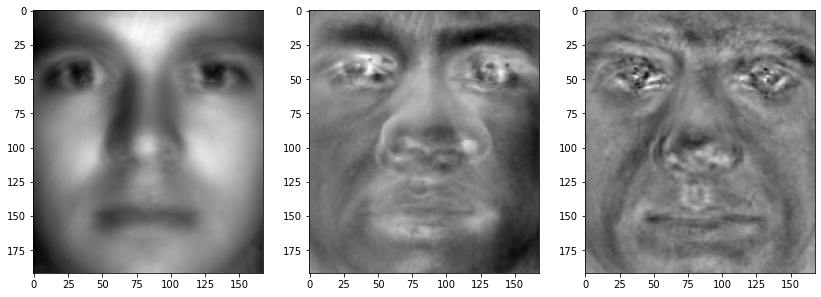

In [104]:
print(U[:, 0])

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 22))

ax1.imshow((U[:, 0]).reshape(img_size), cmap='gray')
ax2.imshow((U[:, 4]).reshape(img_size), cmap='gray')
ax3.imshow((U[:, 25]).reshape(img_size), cmap='gray')

In [105]:

test_images = []

imagett = cv2.imread("faces_test/test01.pgm", cv2.IMREAD_GRAYSCALE)
test_images.append(image)

length, height = imagett.shape
imagett = imagett.reshape((length * height * 1, 1))

for i in range(2, 6):
    x = cv2.imread(f"faces_test/test0{i}.pgm", cv2.IMREAD_GRAYSCALE)
    test_images.append(x)
    temp = x.reshape((length * height * 1, 1))
    imagett = np.concatenate([imagett, temp], axis=1)
    
print(imagett.shape)

(32256, 5)


In [106]:


face_proj = U.T @ train_all_image
test_proj = U.T @ imagett
print(face_proj.shape)
print(test_proj.shape)

(39, 39)
(39, 5)


In [107]:
def similarity_between_faces(face1, face2, plot=False):
    face1 -= 1
    face2 -= 1
    if plot:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,16))
        ax1.imshow(imagett[:, face1].reshape(img_size), cmap='gray')
        ax2.imshow(train_all_image[:, face2].reshape(img_size), cmap='gray')
    
    face_diff = test_proj[:, face1] - face_proj[:, face2]
    
    return np.linalg.norm(face_diff)

3번째 3257.903756001434
11번째 4060.260872421653


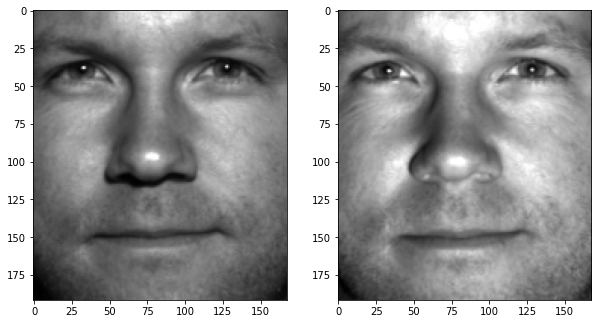

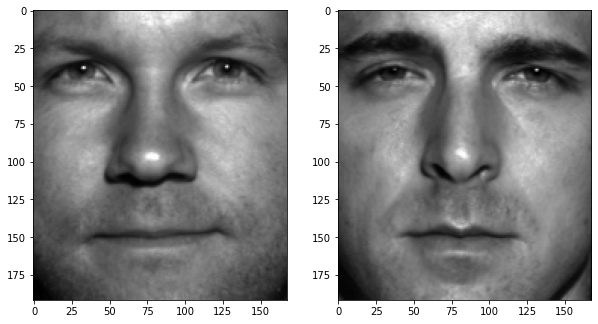

In [108]:

n=2
print(f"{n+1}번째", similarity_between_faces(1, n+1, plot=True))

n=10
print(f"{n+1}번째", similarity_between_faces(1, n+1, plot=True))


In [109]:
# plot 3 most similar faces
def find_3_most_similar_to(face, plot=False):
    best_scores = [9999999, 9999999, 9999999]
    best_face_i = [0, 0, 0]

    distances = []
    for face_i in range(39):
        sim = similarity_between_faces(face, face_i)
        distances.append(sim)
    
    best_scores[0] = min(distances)
    best_face_i[0] = distances.index(min(distances))
    distances[best_face_i[0]] = 999999
    
    best_scores[1] = min(distances)
    best_face_i[1] = distances.index(min(distances))
    distances[best_face_i[1]] = 999999
    
    best_scores[2] = min(distances)
    best_face_i[2] = distances.index(min(distances))
    distances[best_face_i[2]] = 999999
    
    
    plt.imshow(imagett[:, face-1].reshape(img_size), cmap='gray')
    plt.title('Compare to this')
    plt.show()
    
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 18))
    
    ax1.imshow(train_all_image[:, best_face_i[0]-1].reshape(img_size), cmap='gray')
    ax1.set_title("Score: {}".format(int(best_scores[0])))
    
    ax2.imshow(train_all_image[:, best_face_i[1]-1].reshape(img_size), cmap='gray')
    ax2.set_title("Score: {}".format(int(best_scores[1])))
    
    ax3.imshow(train_all_image[:, best_face_i[2]-1].reshape(img_size), cmap='gray')
    ax3.set_title("Score: {}".format(int(best_scores[2])))
    
    return best_face_i, best_scores

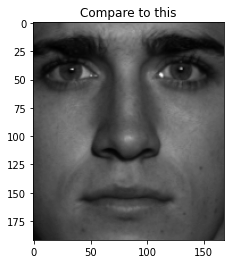

([33, 8, 35], [2411.832888585466, 4291.649291182574, 4355.603934392975])

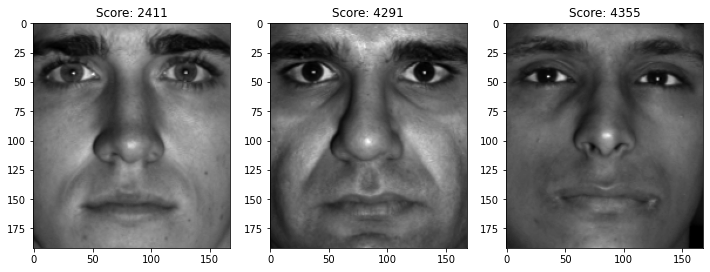

In [110]:
find_3_most_similar_to(5, plot=True)

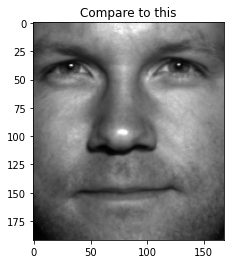

([3, 11, 38], [3257.903756001434, 4060.260872421653, 4495.777821731735])

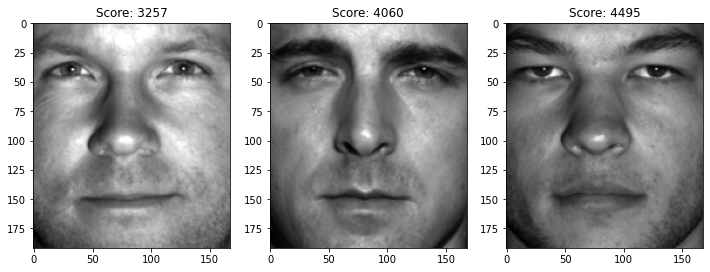

In [111]:
find_3_most_similar_to(1, plot=True)

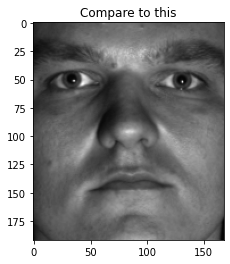

([7, 4, 19], [1595.170936141454, 3703.543934251661, 4622.690080212408])

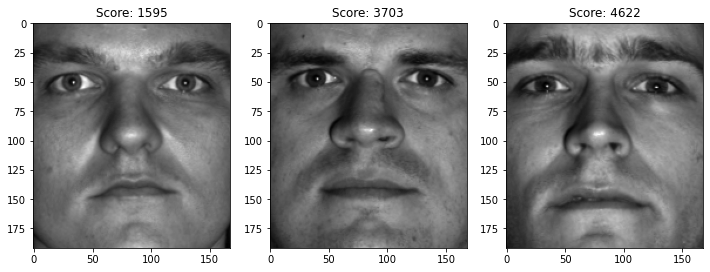

In [112]:
find_3_most_similar_to(2, plot=True)